# Importing Libraries

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras import Model
from tensorflow.keras.metrics import Mean, SparseCategoricalAccuracy, CategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

# Data Preprocessing

## Importing data

In [2]:
dataset=pd.read_csv('A_Z Handwritten Data.csv')
x=dataset.iloc[:, 1:].values
y=dataset.iloc[:, 0].values

In [3]:
x=x.reshape((x.shape[0], int(x.shape[1]**0.5), int(x.shape[1]**0.5), 1))/255
y=y.reshape((-1,1))
np.save('x.npy',x)
np.save('yne.npy',y)

## Loading data

In [2]:
x=np.load('x.npy')
y=np.load('y.npy')

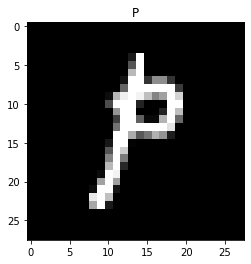

In [3]:
rn=random.randint(0,y.shape[0]-1)
c = y[rn, :]
c = chr(np.where(c == 1)[0][0] + ord('A'))
plt.imshow(x[rn, :, :].reshape((x.shape[1], x.shape[2])), cmap='gray')
plt.title(c)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
del(x)
del(y)

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# Neural Network

In [6]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(64, 3, activation = 'relu')
        self.pool1 = MaxPool2D()
        self.conv2 = Conv2D(128, 3, activation = 'relu')
        self.pool2 = MaxPool2D()
        self.conv3 = Conv2D(256, 3, activation = 'relu')
        self.pool3 = MaxPool2D()
        self.flat = Flatten()
        self.d1 = Dense(256, activation = 'relu')
        self.d2 = Dense(26, activation = 'softmax')
    def call(self, x2):
        x2 = self.conv1(x2)
        x2 = self.pool1(x2)
        x2 = self.conv2(x2)
        x2 = self.pool2(x2)
        x2 = self.conv3(x2)
        x2 = self.pool3(x2)
        x2 = self.flat(x2)
        x2 = self.d1(x2)
        return self.d2(x2)
model = MyModel()

In [18]:
loss_object=CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [19]:
train_loss = Mean()
train_accuracy = CategoricalAccuracy()

test_loss = Mean()
test_accuracy = CategoricalAccuracy()

In [20]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [21]:
@tf.function
def test_step(images, labels):
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

# Training

In [22]:
epochs = 10
for epoch in range(epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
    
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epoch 1, Loss: 3.180523633956909, Accuracy: 14.174385070800781, Test Loss: 3.168830156326294, Test Accuracy: 15.332259178161621
Epoch 2, Loss: 3.1664814949035645, Accuracy: 15.573902130126953, Test Loss: 3.168830156326294, Test Accuracy: 15.332259178161621
Epoch 3, Loss: 3.166501522064209, Accuracy: 15.573902130126953, Test Loss: 3.168830156326294, Test Accuracy: 15.332259178161621
Epoch 4, Loss: 3.166501522064209, Accuracy: 15.573902130126953, Test Loss: 3.168830156326294, Test Accuracy: 15.332259178161621
Epoch 5, Loss: 3.166501522064209, Accuracy: 15.573902130126953, Test Loss: 3.168830156326294, Test Accuracy: 15.332259178161621
Epoch 6, Loss: 3.1664915084838867, Accuracy: 15.573902130126953, Test Loss: 3.168830156326294, Test Accuracy: 15.332259178161621
Epoch 7, Loss: 3.1665117740631104, Accuracy: 15.573902130126953, Test Loss: 3.168830156326294, Test Accuracy: 15.332259178161621
Epoch 8, Loss: 3.1665117740631104, Accuracy: 15.573902130126953, Test Loss: 3.168830156326294, Test A